Title - Classifying IMDB movie review dataset using deep neural network-binary classification
problem.


Introduction:
In this lab, we aim to build a deep neural network for classifying movie reviews from the IMDB dataset as positive or negative sentiment. The dataset contains movie reviews, each associated with a binary sentiment label: 0 for negative and 1 for positive. The goal is to create a model that can accurately predict the sentiment of a given movie review.

Data Preprocessing: We begin by loading the IMDB dataset using Keras' built-in imdb.load_data() function, which provides the dataset split into training and test sets. To ensure efficient processing and maintain meaningful information, we limit the vocabulary to the top 10,000 most frequent words. Since neural networks require input data of the same length, we pad the sequences to a maximum length of 256 using pad_sequences().

Model Architecture: The neural network is designed using the Keras Sequential API, which allows us to stack layers sequentially.
The first layer is an Embedding layer, which learns word embeddings to represent each word in the movie reviews. It converts integer-encoded words into dense vectors of fixed size (output_dim=16).
The GlobalAveragePooling1D layer is used to average the embeddings across all words in the sequence, reducing the dimensionality and providing a fixed-length representation of the review.
A fully connected Dense layer with 16 units and the ReLU activation function helps to learn non-linear patterns in the data.
Finally, a single-unit Dense layer with the sigmoid activation function is used to perform binary classification, predicting whether the sentiment is positive or negative.

Model Compilation: The model is compiled using the binary_crossentropy loss function, suitable for binary classification problems.
We use the Adam optimizer, an efficient variant of stochastic gradient descent, to optimize the model parameters during training.
The metric we monitor during training is accuracy, which gives the percentage of correctly classified samples.

Training and Validation: We set an early stopping callback to prevent overfitting. The training process stops when the validation loss does not improve for two consecutive epochs, and the model is restored to the best weights.The model is trained for 20 epochs with a batch size of 512.
A 20% validation split is used to monitor the model's performance during training.

Results and Visualization:We plot the training and validation accuracy over epochs to visualize the model's learning progress.
Another plot displays the training and validation loss, showing how well the model is minimizing the loss function during training.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
num_words = 10000  # Consider the top 10,000 words only
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to make them of the same length
max_sequence_length = 256  # Maximum length of a review
x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers
import keras

# Build the model
model = keras.Sequential([
    layers.Embedding(input_dim=10000,output_dim=16),
    layers.GlobalAveragePooling1D(),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 20
batch_size = 512

early_stopping = EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
40/40 [==============================] - 13s 183ms/step - loss: 0.6910 - accuracy: 0.5893 - val_loss: 0.6871 - val_accuracy: 0.6944
Epoch 2/20
40/40 [==============================] - 7s 186ms/step - loss: 0.6798 - accuracy: 0.7163 - val_loss: 0.6683 - val_accuracy: 0.7520
Epoch 3/20
40/40 [==============================] - 6s 143ms/step - loss: 0.6529 - accuracy: 0.7670 - val_loss: 0.6321 - val_accuracy: 0.7728
Epoch 4/20
40/40 [==============================] - 6s 142ms/step - loss: 0.6083 - accuracy: 0.7923 - val_loss: 0.5815 - val_accuracy: 0.7944
Epoch 5/20
40/40 [==============================] - 5s 120ms/step - loss: 0.5502 - accuracy: 0.8249 - val_loss: 0.5241 - val_accuracy: 0.8152
Epoch 6/20
40/40 [==============================] - 4s 115ms/step - loss: 0.4897 - accuracy: 0.8463 - val_loss: 0.4718 - val_accuracy: 0.8370
Epoch 7/20
40/40 [==============================] - 4s 88ms/step - loss: 0.4340 - accuracy: 0.8632 - val_loss: 0.4274 - val_accuracy: 0.8538
Epoch 

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.2939 - accuracy: 0.8802
Test Loss: 0.2938902676105499
Test Accuracy: 0.8802400231361389


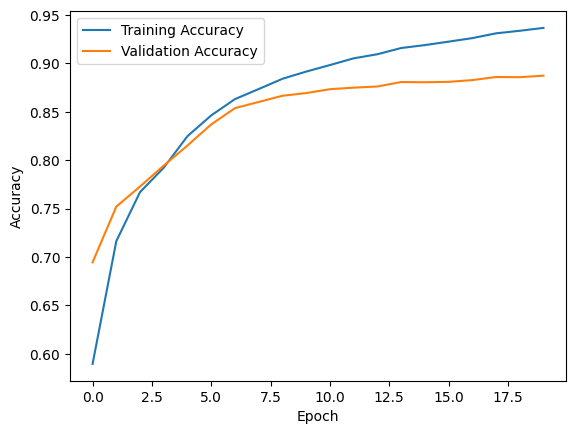

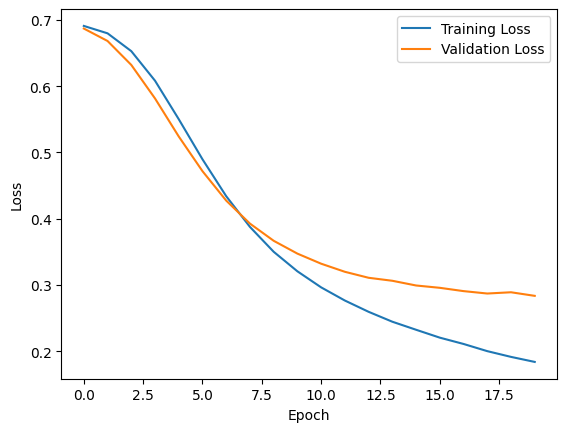

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()